In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score 
from sklearn.datasets import make_blobs, make_moons, make_circles 

In [2]:
def plot_decision_boundary(X,y,clf=None):
    fig=plt.figure(figsize=(10,6))
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y,cmap='viridis',s=30, zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis',
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

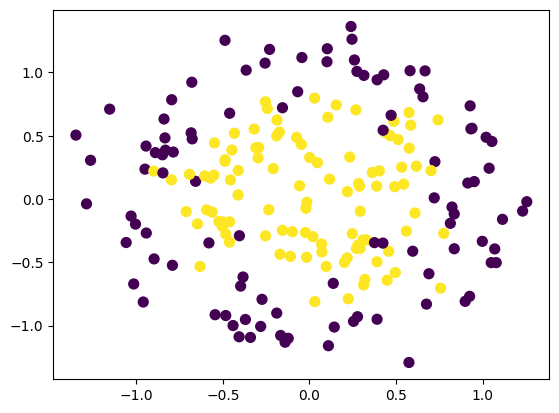

In [8]:
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42) 
#X, y = make_moons(n_samples=200, noise=0.3, random_state=0) 
             
plt.scatter(X[:, 0], X[:, 1], s=50, c=y) 
plt.show() 

In [47]:
# trening i ocena modelu 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
svc = SVC(kernel='rbf', C=10, gamma=0.2)  # kernel=???, degree= ???,  C=???, gamma=??? 
svc.fit(X_train, y_train) 
print('Accuracy (train):', accuracy_score(y_train, svc.predict(X_train))) 
print('Classification report (test)') 
print(classification_report(y_test, svc.predict(X_test))) 

Accuracy (train): 0.88125
Classification report (test)
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.81      0.94      0.87        18

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.89      0.88      0.88        40



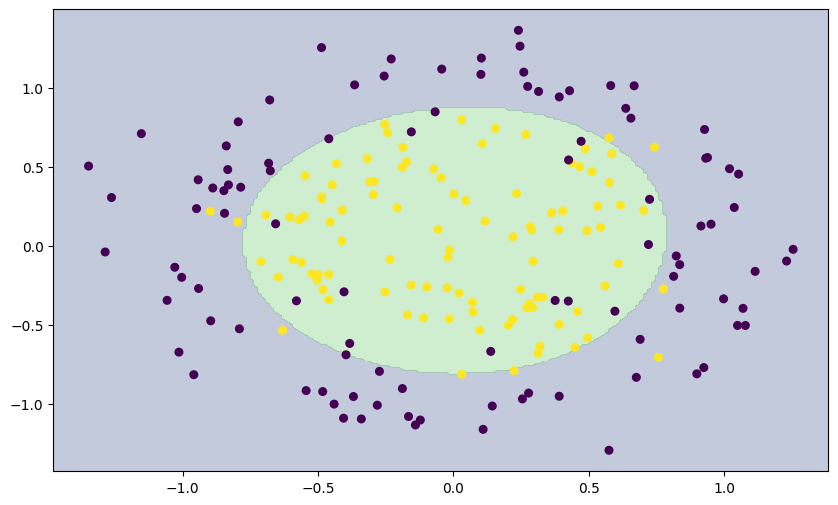

In [48]:
# Rysowanie granic decyzyjnych 
plot_decision_boundary(X, y, svc) 

In [51]:
# Automatyczne wyszukiwanie najlepszych hiperparametrów algorytmu SVM 
# Wariant I 
from sklearn.model_selection import GridSearchCV 
clf = GridSearchCV(estimator=SVC(kernel='poly'), param_grid={'degree': [2, 3],'C': [10, 1, 0.1], 'gamma': [1, 10]}, 
                                    cv=4, verbose=3, scoring='accuracy') 
clf.fit(X_train, y_train) 
print('Best: ', clf.best_params_) 
print('Best: ', clf.best_score_) 

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END ...........C=10, degree=2, gamma=1;, score=0.875 total time=   0.0s
[CV 2/4] END ...........C=10, degree=2, gamma=1;, score=0.900 total time=   0.0s
[CV 3/4] END ...........C=10, degree=2, gamma=1;, score=0.950 total time=   0.0s
[CV 4/4] END ...........C=10, degree=2, gamma=1;, score=0.850 total time=   0.0s
[CV 1/4] END ..........C=10, degree=2, gamma=10;, score=0.875 total time=   0.0s
[CV 2/4] END ..........C=10, degree=2, gamma=10;, score=0.900 total time=   0.0s
[CV 3/4] END ..........C=10, degree=2, gamma=10;, score=0.950 total time=   0.0s
[CV 4/4] END ..........C=10, degree=2, gamma=10;, score=0.825 total time=   0.0s
[CV 1/4] END ...........C=10, degree=3, gamma=1;, score=0.675 total time=   0.0s
[CV 2/4] END ...........C=10, degree=3, gamma=1;, score=0.550 total time=   0.0s
[CV 3/4] END ...........C=10, degree=3, gamma=1;, score=0.600 total time=   0.0s
[CV 4/4] END ...........C=10, degree=3, gamma=1;

In [52]:
# Wariant II 
param_grid={'C': [i*i*0.1 for i in range(1, 20)], 'gamma': [i*i*0.1 for i in range(1, 20)]} 
clf = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=param_grid, cv=5, verbose=3, scoring='accuracy') 
clf.fit(X_train, y_train) 
print('Best: ', clf.best_params_) 
print('Best: ', clf.best_score_) 

Fitting 5 folds for each of 361 candidates, totalling 1805 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.531 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.531 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.500 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.4;, score=0.625 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.4;, score=0.531 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.4;, score=0.531 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.4;, score=0.500 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.4;, score=0.500 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.9;, score=0.781 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0